# Regressão Logistica

 - Informações sobre o conjunto de dados
    1. variance of Wavelet Transformed image (continuous)
    2. skewness of Wavelet Transformed image (continuous)
    3. curtosis of Wavelet Transformed image (continuous)
    4. entropy of image (continuous)
    5. class (integer)


No bloco abaixo estão definidos alguns import's necessarios para  o funcionamento do algoritmo, onde o mesmo foi
separado em 5 blocos, onde os mesmo são treino, teste, gradiente descendente, predict, e o bloco de run, onde será
testado o codigo.

In [1]:
import sys 

sys.path.append("/home/davi/PycharmProjects/Reconhecimento-de-Padroes")

from Strings import string
from sklearn.model_selection import train_test_split
from numpy import zeros, concatenate, ones, where, array, argmin, log, exp, mean, argmax
from numpy.random import rand
from src.Utils.utils import sigmoid, get_data, get_confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold


ephocs = 1000
ERROR = [] 

# python notebook for logist regression

O bloco abaixo se refere ao bloco do gradiente descendente, onde há o calculo da derivada do erro: 

\begin{equation}
    \nabla{E_{in}(\mathbf{w})} = -\frac{1}{N}\sum_{n=1}^{N}\frac{y_{n}\mathbf{x_{n}}}{1 + e^{y_{n}\mathbf{w'x_{n}}}} 
\end{equation}

In [2]:
def gradient_descent(X, Y, U, error, eta=1e-1):
    if array(Y, ndmin=2).shape[1] != 1:
        aux_y = array(Y, ndmin=2).T
    else:
        aux_y = array(Y, ndmin=2)

    derivate = (sum((aux_y * X) / (1 + exp(U))))*(1./len(aux_y))
    return array(eta * derivate, ndmin=2).T

O bloco abaixo se refere ao bloco da predição, para ele é passado apenas:

\begin{equation} 
u = f(\mathbf{x}) = \sum_{i=1}^{p}{w_i \cdot x_i}
\end{equation}

e nele será calculado:

\begin{equation}
    \mathbb{P}[y|x] = \begin{cases}
        f(\mathbf{x})  & y = +1 \\
        1 -  f(\mathbf{x}) &  y = -1
        \end{cases}
\end{equation}


In [3]:
def predict(u):
    Y_output = zeros((u.shape[0], 1))
    indices_j = where((1 - u) > u)
    indices_i = where(u > (1 - u))
    Y_output[indices_j] = -1
    Y_output[indices_i] = 1

    return Y_output

O bloco treino, esta logo abaixo e nele são executadas 1000 epocas


In [4]:
def train(x_train, y_train, eta=1e-1):
    bias = -1. * ones((x_train.shape[0]))
    x_train = concatenate((array(bias, ndmin=2).T, x_train), axis=1)
    N_features = x_train.shape[1]
    Wheigts = rand(N_features, 1)

    for epoch in range(1000):
        if array(y_train, ndmin=2).shape[1] != 1:
            aux_y = array(y_train, ndmin=2).T
        else:
            aux_y = array(y_train, ndmin=2)
        u = aux_y * (x_train.dot(Wheigts))
        H = sigmoid(True, -u)
        Y = predict(H)

        # Error = Y - array(y_train, ndmin=2).T
        Error = sum(log(1 + exp(-1. * u)))
        if Error <= 1.:
            ERROR.append(Error)
            return Wheigts


        Wheigts += gradient_descent(x_train, y_train, u, Error, eta=eta)

    return Wheigts

Bloco de teste

In [5]:
def test(Wheigts, x_test, y_test, flag=False):
    bias = -1. * ones((x_test.shape[0]))
    x_test = concatenate((array(bias, ndmin=2).T, x_test), axis=1)
    u = x_test.dot(Wheigts)
    H = sigmoid(True, u)
    Y = predict(H)

    if flag:
        return Y

    if array(y_test, ndmin=2).shape[1] != 1:
        aux_y = array(y_test, ndmin=2).T
    else:
        aux_y = array(y_test, ndmin=2)
    
    accuracy = sum(Y == aux_y) / (1.0 * len(y_test))


    return accuracy

In [6]:

data = get_data("data_banknote_authentication.txt", type="csv")
number_lines = data.shape[0]
number_columns = data.shape[1]
X = array(data, ndmin=2)[:, :number_columns-1]
Y =   array(array(data, ndmin=2)[:, number_columns-1], ndmin=2).T
train_size = .8
test_size = .2

indices = where(Y == 0)
Y[indices] = -1

print(X)
print(Y) 


[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]
[[-1.]
 [-1.]
 [-1.]
 ...
 [ 1.]
 [ 1.]
 [ 1.]]



            Realização: 0 

            Epocas: 1000 

            Acuracia: [0.98545455] 

            Matriz de confusão: 

    
          

            Realização: 1 

            Epocas: 1000 

            Acuracia: [0.98545455] 

            Matriz de confusão: 

    
          

            Realização: 2 

            Epocas: 1000 

            Acuracia: [0.98545455] 

            Matriz de confusão: 

    
          

            Realização: 3 

            Epocas: 1000 

            Acuracia: [0.98909091] 

            Matriz de confusão: 

    
          

            Realização: 4 

            Epocas: 1000 

            Acuracia: [0.99636364] 

            Matriz de confusão: 

    
          
0.9883636363636364


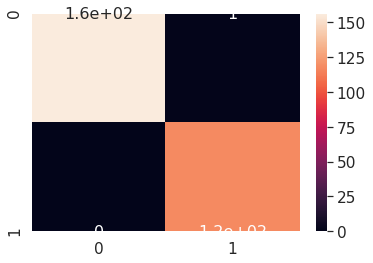

In [10]:
acc = []
acc_eta = []
kf = KFold(n_splits=10)
eta_validation_vector = [1., 0.15, 0.1, 1e-2, 1e-3]
for realization in range(5):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)
    
    for eta_val in eta_validation_vector:
        acc_validation = []
        for train_index, test_index in kf.split(x_train):
            # print("TRAIN:", train_index, "TEST:", test_index)
            x_train_val, x_test_val = x_train[train_index], x_train[test_index]
            y_train_val, y_test_val = y_train[train_index], y_train[test_index]
    
            wheiths_val = train(x_train_val, y_train_val, eta=eta_val)
            accuracy = test(wheiths_val, x_test_val, y_test_val)
            
            acc_validation.append(accuracy)
        acc_eta.append(mean(acc_validation))
            
            
    indice = argmax(acc_eta)
                
    wheiths = train(x_train, y_train, eta=eta_validation_vector[indice])
    accuracy = test(wheiths, x_test, y_test)
    y_output = test(wheiths, x_test, y_test, flag=True)
    acc.append(accuracy)
    
    
    confusion_matrix = get_confusion_matrix(y_output, y_test)
    print(string.RUN.format(realization, 1000, accuracy, confusion_matrix))

plot_confusion_matrix(confusion_matrix)    
print(mean(acc))
